# 0. Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   
import warnings
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

sns.set_theme(style="darkgrid")
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/FT1000_v1.csv')
df.head()

,Rank,Name,Ranked2021,Ranked2020,Country,Sector,CAGR,Revenue2020,Revenue2017,Employees2020,Employees2017,FoundingYear,Country1,Sector1
0,1,Swappie,No,No,Finland,Technology,477.43,97611814,507000,218,1,2016,Finland,Technology
1,2,Kilo Health,No,No,Lithuania,Health,450.05,57318766,344428,177,10,2013,Lithuania,Health
2,3,OCI,No,No,UK,Financial Services,409.59,568322073,4325512,32,4,2012,UK,Financial Services
3,4,OnlyFans,No,No,UK,Technology,393.63,316732986,2652185,800,4,2016,UK,Technology
4,5,Enpal,No,No,Germany,Energy,386.88,56109613,486165,365,9,2017,Germany,Energy


# 3. Data Understanding
## 3.1. Phân bố của dữ liệu trong từng cột
### 3.1.1. Phân bố của 2 cột `Ranked2020` và `Ranked2021`
2 cột này cho thấy công ty có nằm trong bảng xếp hạng FT1000 nằm 2020 và 2021.

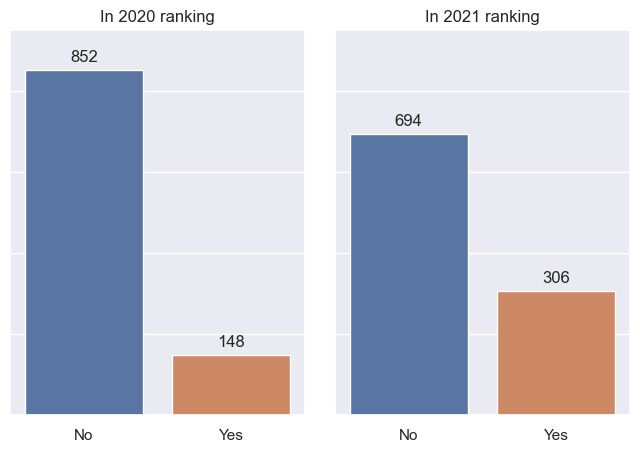

In [3]:
fig, axes = plt.subplots(ncols = 2, figsize = (8, 5), sharey = True)
fig.subplots_adjust(wspace = 0.1)

data = df['Ranked2020'].value_counts().reset_index()
sns.barplot(data = data, x = 'index', y = 'Ranked2020', ax = axes[0])

data = df['Ranked2021'].value_counts().reset_index()
sns.barplot(data = data, x = 'index', y = 'Ranked2021', ax = axes[1])

axes[0].set_title('In 2020 ranking')
axes[1].set_title('In 2021 ranking')

axes[0].set_xlabel('')
axes[1].set_xlabel('')
axes[0].set_ylabel('')
axes[1].set_ylabel('')

axes[0].set_yticklabels('')

axes[0].set_ylim(0, 950)

for ax in axes.flatten():
    for p in ax.patches:
        ax.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 20), ha = 'center')

Ta nhận thấy số lượng công ty xuất hiện trong bảng xếp hạng năm 2022 cũng xuất hiện trong năm 2021 nhiều hơn năm 2020. 

### 3.1.2. Phân bố của cột `Country`
Ở phần này nhóm sẽ sử dụng cột `Country` với đầy đủ các quốc gia

In [22]:
data = df['Country'].value_counts().reset_index()
data.columns = ['Country', 'Count']
data['CountBinned'] = pd.cut(data['Count'], 
    bins = [0, 10, 50, 150, 200, 250],
    labels = ['0-10', '10-50', '100-150', '150-200', '200-250']
)

In [23]:
fig = px.choropleth(
    data_frame = data, locations = 'Country', locationmode = 'country names', color = 'CountBinned', 
    width = 800, height = 600)
    
fig.update_layout(
    legend = dict(
        title = 'Number of companies in each country',
        orientation = 'h', x = 1, y = 1, xanchor = 'right', yanchor = 'top',
    ), 
    margin = {'t': 0, 'b': 0, 'l': 0, 'r': 0},
    geo = go.layout.Geo(
        projection = go.layout.geo.Projection(scale = 1.5),
        scope = 'europe',
    )
)
fig.show()

Đa số các nước Đông Âu và Bắc Âu, có khá ít công ty tham gia (dưới 50 công ty), chỉ một số nước Tây Âu như Anh, Pháp, Đức mới mới có từ 100 công ty trở lên được xếp hạng, đặc biệt Ý có đến 200 công ty được xếp hạng

### 3.1.3. Phân bố của cột `Sector`

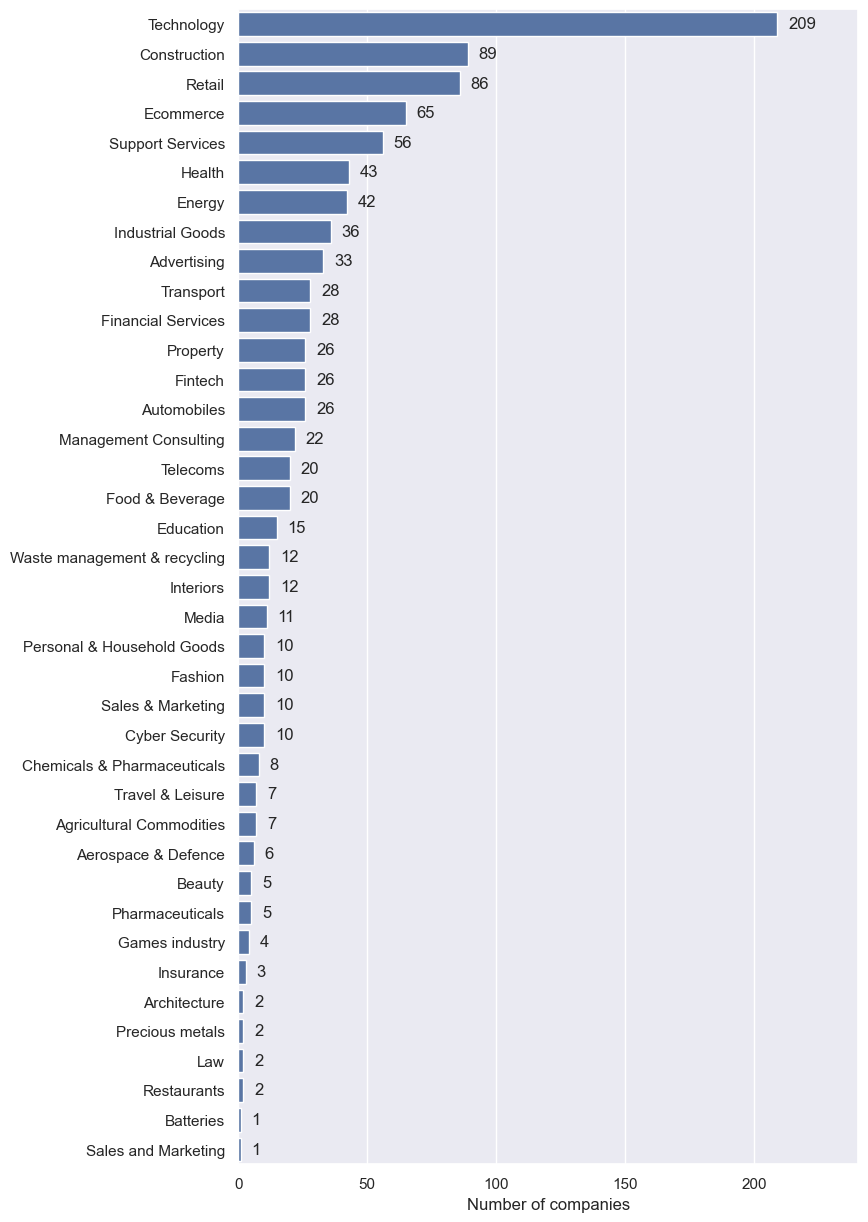

In [6]:
data = df['Sector'].value_counts().reset_index()
data.columns = ['Sector', 'Count']

plt.figure(figsize = (8, 15))
ax = sns.barplot(data = data, x = 'Count', y = 'Sector', color = 'C0')

ax.set_xlim(0, data['Count'].max() * 1.15)
ax.set_xlabel('Number of companies')
ax.set_ylabel('')
dis_from_bar =  data['Count'].max() * 0.02

for p in ax.patches:
    ax.annotate(int(p.get_width()), (p.get_width() + dis_from_bar, p.get_y() + p.get_height() / 2), va = 'center')

Đa số các công ty xếp hạng là công ty trong lĩnh vực công nghệ (`Technology`), xây dựng (`Construction`), bán lẻ (`Retail`) và thương mại điện tử (`Ecommerce`)

### 3.1.4. Phân bố của `CAGR (tỉ lệ tăng trưởng kép hàng năm)`
2 cột này cho thấy mức độ tăng trướng của công ty, cũng chính là thang đo để xếp hạng các công ty với nhau

<AxesSubplot:xlabel='CAGR'>

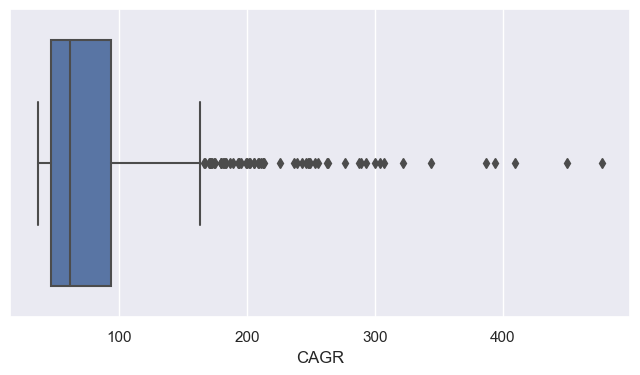

In [7]:
plt.figure(figsize = (8, 4))

sns.boxplot(df['CAGR'])

Đa số các công ty tăng trưởng dưới mức 200%/năm, chỉ có các công ty top đầu có mức tăng trưởng trên 200%/năm

### 3.1.5. Phân bố của cột `Revenue`

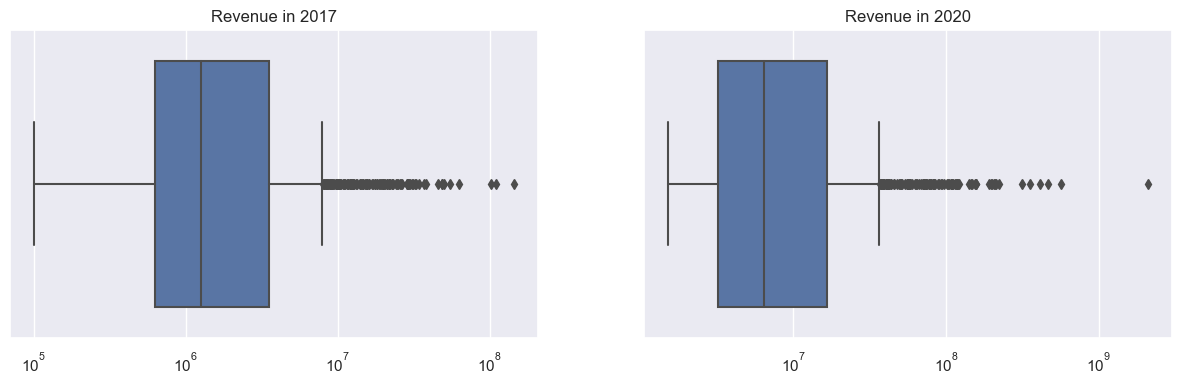

In [8]:
fig, axes = plt.subplots(ncols = 2, figsize = (15, 4))

sns.boxplot(df['Revenue2017'], ax = axes[0])
sns.boxplot(df['Revenue2020'], ax = axes[1])

axes[0].set_title('Revenue in 2017')
axes[1].set_title('Revenue in 2020')

axes[0].set_xlabel('')
axes[1].set_xlabel('')

axes[0].set_xscale('log')
axes[1].set_xscale('log')

- Năm 2017, đa số các công ty có doanh thu dưới $ 10^{7}$ triệu Euro , tập trung ở mức $10^{5.8} \approx{600,000}$ Euro tới $10^{6.5} \approx{3.1}$ triệu Euro, ngoại trừ một số công ty top đầu có doanh thu từ trên $ 10^{8}$ triệu Euro tới 100 triệu Euro
- Ở năm 2020, doanh thu các công ty chủ yếu dưới mức $ 10^{7.5} \approx{31} $ triệu Euro, tập trung trong khoảng $10^{6.5} \approx{3.1}$ triệu Euro tới $10^{7.2} \approx{15}$ triệu Euro, ngoại trừ một số công ty có mức doanh thu từ trên 200 triệu Euro tới mức tối đa là xấp xỉ 2 tỉ Euro

### 3.1.6. Phân bố của cột `Employees2020` và `Employees2017`

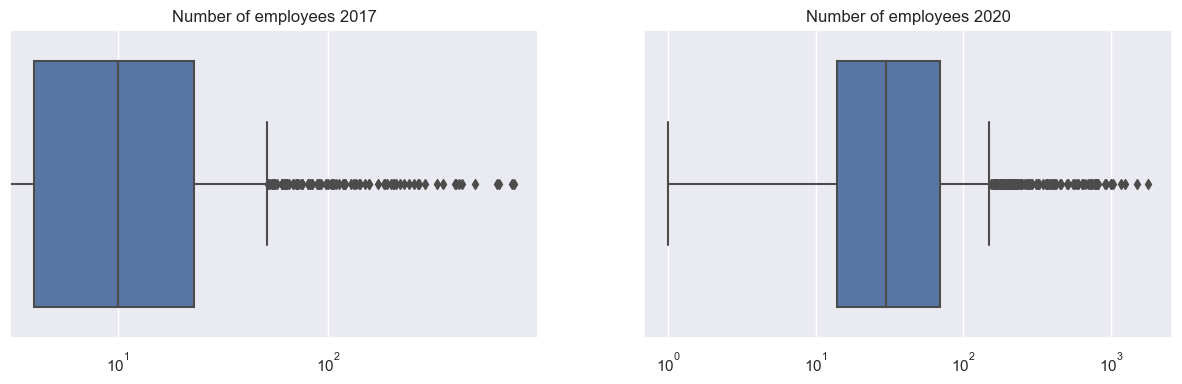

In [9]:
fig, axes = plt.subplots(ncols = 2, figsize = (15, 4))

sns.boxplot(df['Employees2017'], ax = axes[0])
sns.boxplot(df['Employees2020'], ax = axes[1])

axes[0].set_title('Number of employees 2017')
axes[1].set_title('Number of employees 2020')

axes[0].set_xlabel('')
axes[1].set_xlabel('')

axes[0].set_xscale('log')
axes[1].set_xscale('log')

- Năm 2017, đa số công ty có dưới $ 10^{1.6} \approx{40}$ nhân viên, tập trung trong khoảng từ $ 10^{0.5} \approx{3}$ người đến $ 10^{1.5} \approx{30 người}$, ngoài một số công ty có số nhân viên đông hơn từ 300 tới 1000 người
- Năm 2020, đa số công ty có dưới $ 10^{2.2} \approx{150}$ nhân viên, tập trung khoảng từ  $10$ người đến $100$, ngoại trừ một số công ty đông hơn lên đến gần $2000$ người

### 3.1.7. Phân bố cột `Founding Year`
Cột này cho biết năm thành lập của công ty

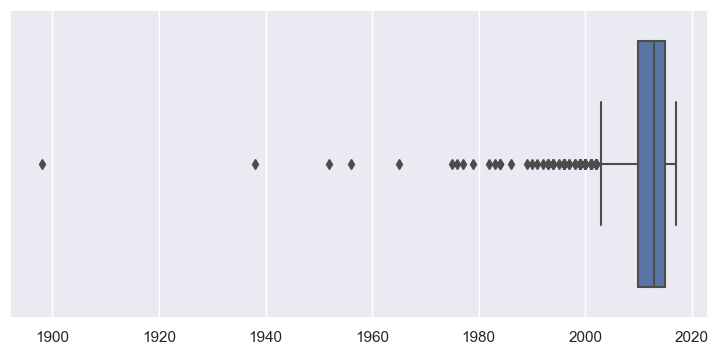

In [10]:
plt.figure(figsize = (9, 4))

ax = sns.boxplot(df['FoundingYear'])
ax.set_xlabel('Founding year')
ax.set_xlabel('');

Đa số các công ty được thành lập vào thế kỉ 20, vào khoảng sau năm 2010, một vài công ty được thành lập từ rất lâu, công ty lâu đời nhất được thành lập từ trước năm 1900 

## 3.2. Quan hệ giữa một số cột
### 3.2.1. Quan hệ giữa cột `Country` và `CAGR`

In [11]:
#Make 2 subplots
fig = make_subplots(
    cols = 2,
    specs = [[{'type': 'Choropleth'}, {'type': 'Choropleth'}]], #Specify type of each subplot
    subplot_titles = ['Mean CAGR by Country', 'Max CAGR by Country'],
)

#Plot mean CAGR by country
data = df[['Country', 'CAGR']].groupby(by = ['Country']).mean().reset_index()
fig.add_trace(go.Choropleth(
    locations = data['Country'], locationmode = 'country names', z = data['CAGR'],
    colorbar = {'x': 0.45}
), row = 1, col = 1)#Set plot position

#Plot max CAGR by country
data = df[['Country', 'CAGR']].groupby(by = ['Country']).max().reset_index()
fig.add_trace(go.Choropleth(
    locations = data['Country'], locationmode = 'country names', z = data['CAGR'],
    colorbar = {'x': 1.05}
), row = 1, col = 2)#Set plot position

#Update layout for easy reading
fig.update_layout(
    geo_scope = 'europe', geo2_scope = 'europe', height = 450, width = 1000,
    margin = {'t': 50, 'b': 0, 'l': 0, 'r': 0},
)

Đa số các nước có mức CAGR thấp, vào khoảng từ 60 tới trên 120%, một số nước có CAGR trung bình cao hơn hẳn là Austria (Áo) với khoảng hơn 140%, Latvia với khoảng 200%. Quan sát qua biểu đồ Max CAGR by Country, ta thấy không phải quốc gia nào có mức CAGR trung bình thấp cũng có mức CAGR tối đa thấp như Finland (Phần Lan), UK (Vương Quốc Anh), France (Pháp), Germany (Đức), Italy (Ý) có mức CAGR tối đa thuộc hàng cao nhưng có CAGR trung bình thuộc hàng thấp. Ta có thể quan sát thêm biểu đồ dưới đây để hiểu rõ hơn

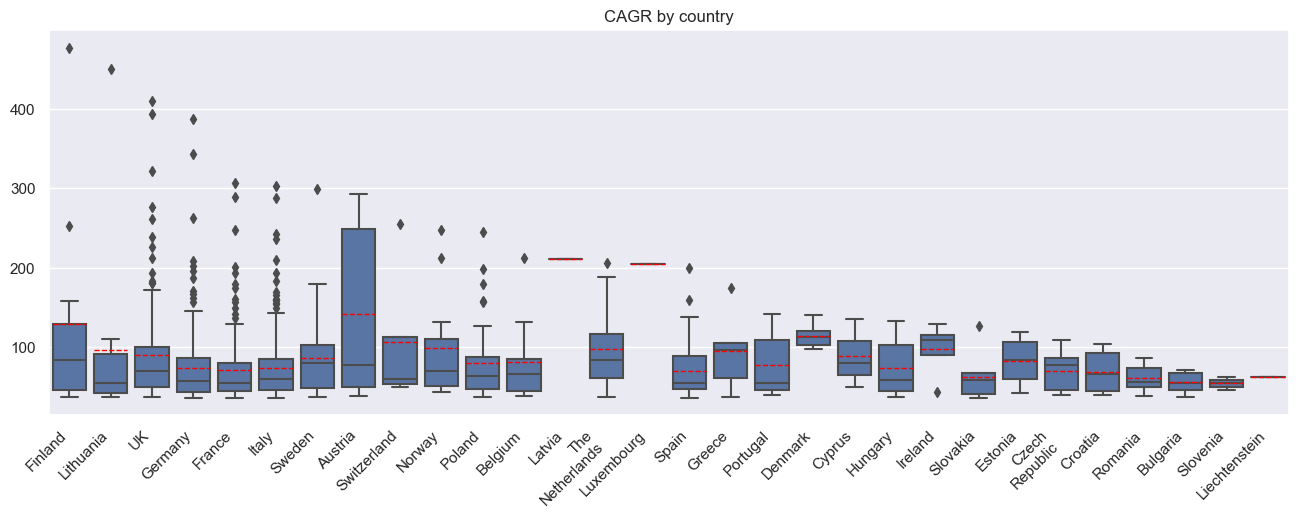

In [12]:
plt.figure(figsize = (16, 5))

ax = sns.boxplot(data = df, x = 'Country', y = 'CAGR', color = 'C0', showmeans = True, meanline = True, meanprops = {'color': 'red'})

ax.set_xticklabels([label.replace(' ', '\n') for label in df['Country'].unique()], rotation = 45, ha = 'right')
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('CAGR by country');

Quan sát biểu đồ trên ta có thể thấy lí do nhiều nước có CAGR trung bình thấp dù có CAGR tối đa cao là do các nước này có nhiều công ty được xếp hạng, các công ty có mức CAGR thấp quá nhiều sẽ kéo mức CAGR trung bình của nước đó xuống. Một số nước có CAGR cao vượt trội là do nước đó chỉ có một công ty được xếp hạng và công ty đó cũng có CAGR cao

### 3.2.2 Quan hệ giữa cột `Country` và `Revenue`
Ở đây ta chỉ xét Revenue2020, tức doanh thu năm 2020

In [13]:
data = df[['Country', 'Revenue2020']].groupby(by = ['Country']).mean().reset_index()

fig = px.choropleth(
    data_frame = data, locations = 'Country', locationmode = 'country names', color = 'Revenue2020', 
    width = 600, height = 480)
    
fig.update_layout(
    legend = dict(
        title = 'Average Revenue 2020 in each country',
        orientation = 'h', x = 1, y = 1, xanchor = 'right', yanchor = 'top',
    ), 
    margin = {'t': 0, 'b': 0, 'l': 0, 'r': 0},
    geo = go.layout.Geo(
        projection = go.layout.geo.Projection(scale = 1.5),
        scope = 'europe',
    )
)
fig.show()

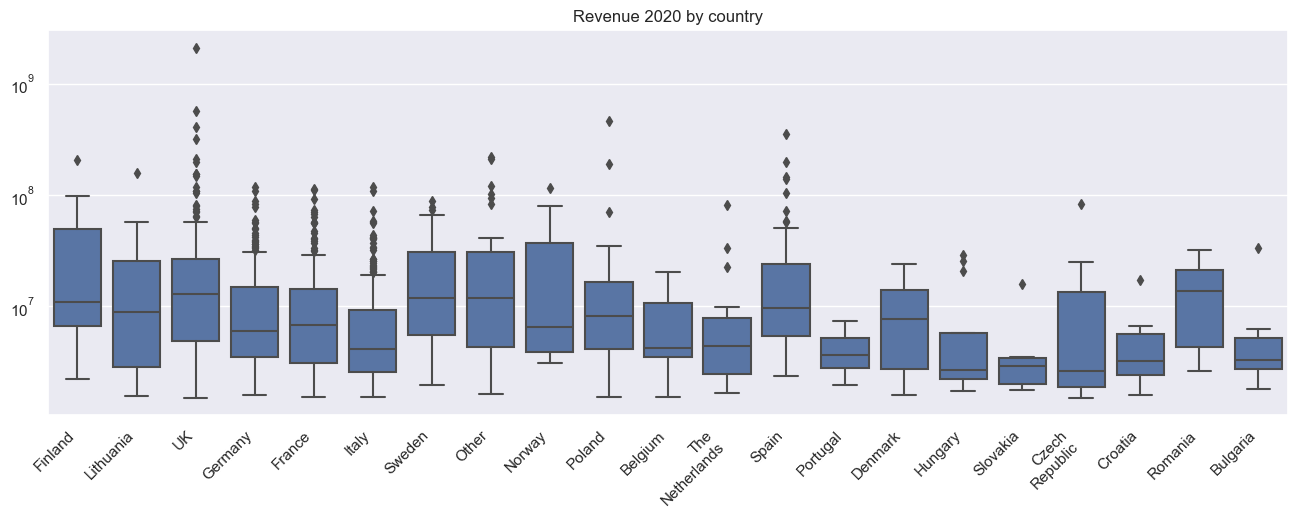

In [14]:
plt.figure(figsize = (16, 5))

ax = sns.boxplot(data = df, x = 'Country1', y = 'Revenue2020', color = 'C0')
ax.set_yscale('log')

ax.set_xticklabels([label.replace(' ', '\n') for label in df['Country1'].unique()], rotation = 45, ha = 'right')
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('Revenue 2020 by country');

- Đa số các nước có doanh thu năm 2020 trung bình dưới mức $10^8$ Euro, trừ một số có ít công ty tham gia (như trường hợp của CAGR) có doanh thu trung bình cao lên tới 200 triệu Euro như Luxembourg (chấm vàng ở giữa bản đồ)
- Doanh thu của các công ty đa số có khoảng tứ phân vị trong khoảng $10^6.2$ tới $10^7.3$, trừ một số nước như Finland, Lithunania, UK, Sweden, Norway có phân bố doanh thu trải rộng hơn và cao hơn.

### 3.2.3. Quan hệ giữa cột `CAGR` và `FoundingYear`

Text(0, 0.5, '')

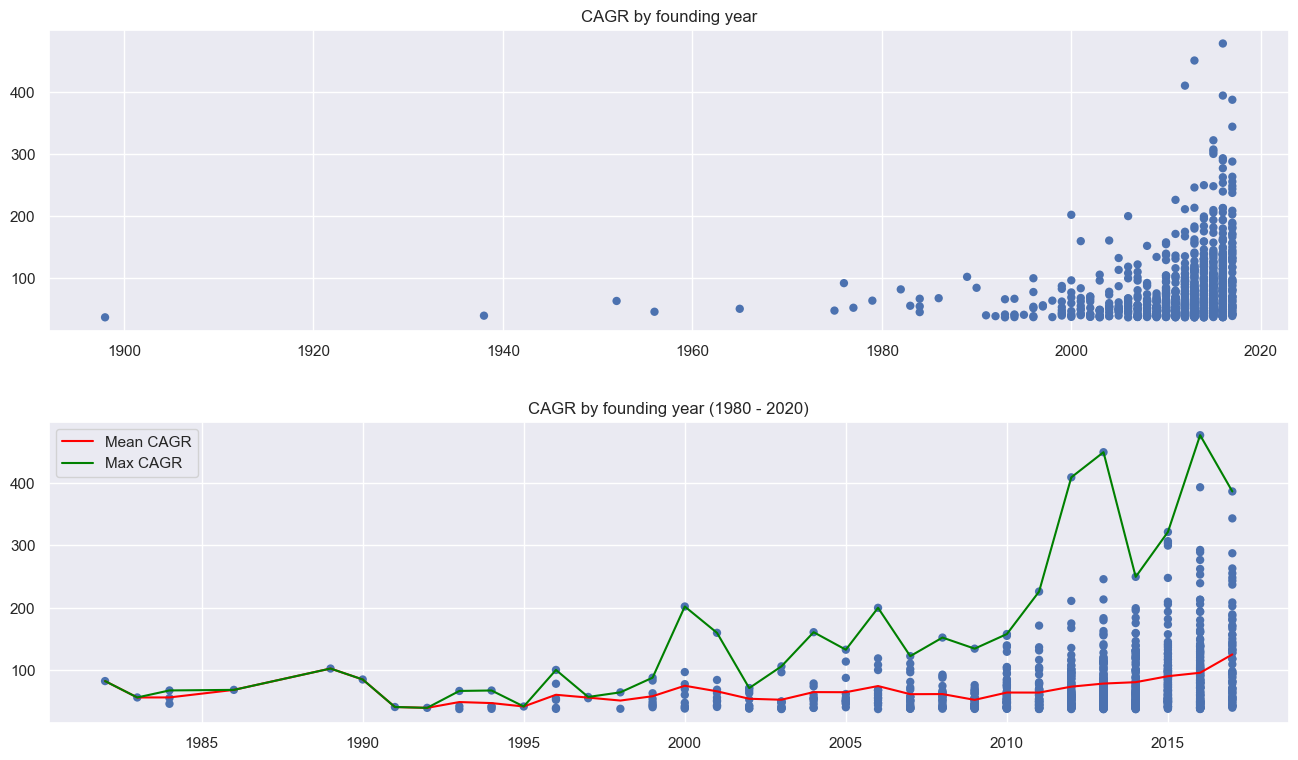

In [15]:
fig, axes = plt.subplots(nrows = 2, figsize = (16, 9))
fig.subplots_adjust(hspace = 0.3)

sns.scatterplot(data = df, x = 'FoundingYear', y = 'CAGR', color = 'C0', edgecolor = 'None', ax = axes[0])
sns.scatterplot(data = df[df['FoundingYear'] >= 1980], x = 'FoundingYear', y = 'CAGR', color = 'C0', edgecolor = 'None', ax = axes[1])

data = df[['FoundingYear', 'CAGR']].groupby(by = ['FoundingYear']).mean().reset_index()
sns.lineplot(data = data[data['FoundingYear'] >= 1980], x = 'FoundingYear', y = 'CAGR', color = 'red', ax = axes[1], label = 'Mean CAGR')

data = df[['FoundingYear', 'CAGR']].groupby(by = ['FoundingYear']).max().reset_index()
sns.lineplot(data = data[data['FoundingYear'] >= 1980], x = 'FoundingYear', y = 'CAGR', color = 'green', ax = axes[1], label = 'Max CAGR')

axes[0].set_title('CAGR by founding year')
axes[1].set_title('CAGR by founding year (1980 - 2020)')

axes[0].set_xlabel('')
axes[1].set_xlabel('')
axes[0].set_ylabel('')
axes[1].set_ylabel('')

Nhìn chung các công ty thành lập ở các năm gần hiện tại hơn sẽ có số lượng đông hơn cũng như mức phát triển tối đa cao hơn so với những công ty thành lập từ sớm hơn

### 3.2.4. Quan hệ giữa cột `Sector` và `CAGR`

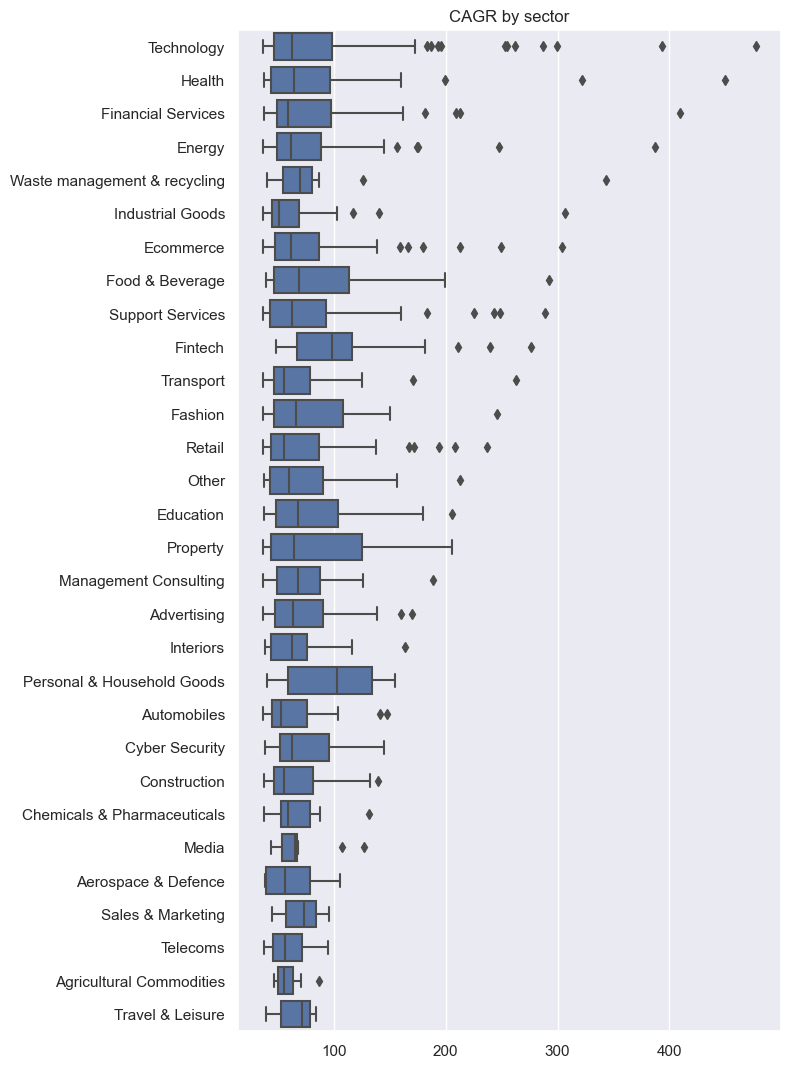

In [16]:
plt.figure(figsize = (7, 13))

ax = sns.boxplot(data = df, x = 'CAGR', y = 'Sector1', color = 'C0')

ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('CAGR by sector');

- Đa số khoảng tứ phân vị của các lĩnh vực nằm dưới mức 100%, mỗi số lĩnh vực trải rộng hơn như Property, Personal & Household Goods có khoảng tứ phân vị trải rộng hơn
- Đa số các lĩnh vực có phân bố dưới 200% CAGR, chỉ một nửa các lĩnh vực top đầu có các outliers vượt lên 200%, đặc biệt Technology có công ty đạt tới hơn 400% CAGR

### 3.2.5. Quan hệ giữa cột `Sector` và `Revenue`
Ở đây nhóm chỉ xét Revenue năm 2020

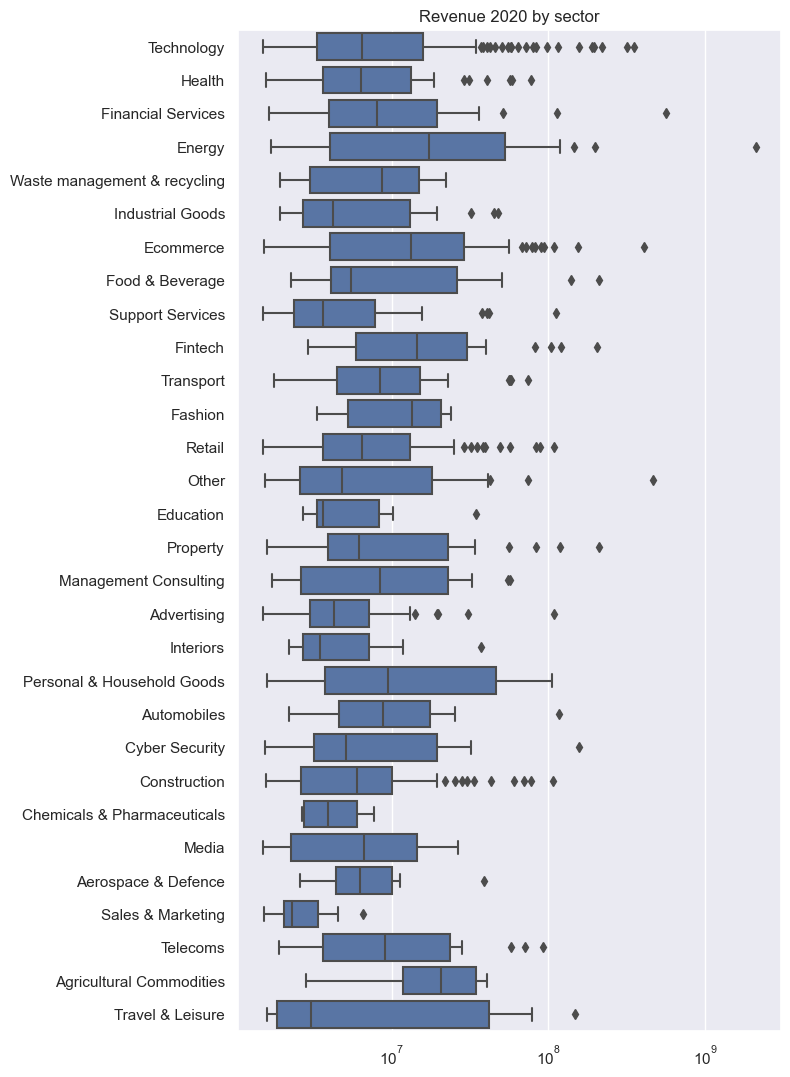

In [17]:
plt.figure(figsize = (7, 13))

ax = sns.boxplot(data = df, x = 'Revenue2020', y = 'Sector1', color = 'C0')

ax.set_xscale('log')
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('Revenue 2020 by sector');

Khoảng 50% các lĩnh vực có mức doanh thu năm 2020 nhỏ hơn $10^7$ Euro, nửa còn lại có mức doanh thu trải dài lên tới $10^8$ Euro. Một số lĩnh vực có các công ty có doanh thu trên $10^8$ Euro, thậm chỉ $10^9$ Euro 

### 3.2.6. Quan hệ giữa cột `Revenue2020` và `Revenue2017`
Cho thấy mối quan hệ giữa doanh thu năm 2020 và 2017

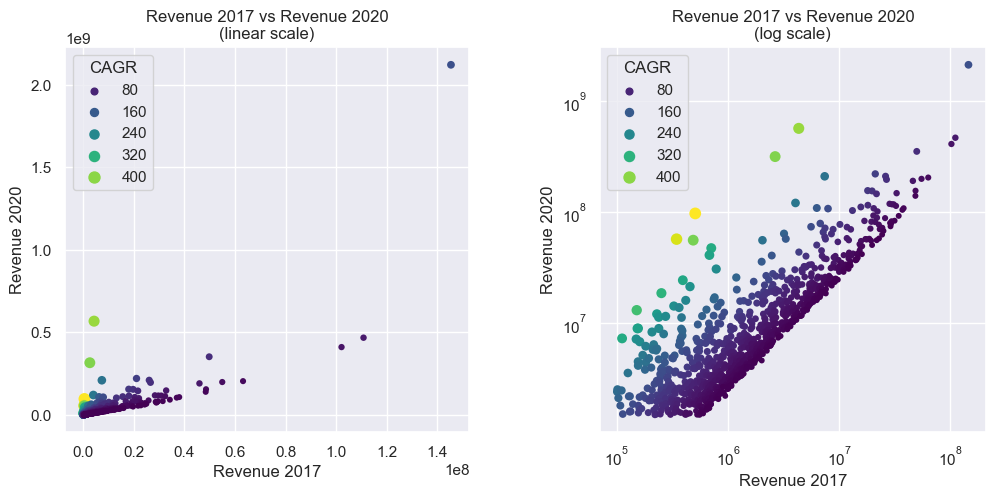

In [18]:
fig, axes = plt.subplots(ncols = 2, figsize = (12, 5))
fig.subplots_adjust(wspace = 0.3)

sns.scatterplot(data = df, x = 'Revenue2017', y = 'Revenue2020', hue = 'CAGR', size = 'CAGR', edgecolor = 'None', palette = 'viridis', ax = axes[0])
axes[0].set_xlabel('Revenue 2017')
axes[0].set_ylabel('Revenue 2020')
axes[0].set_title('Revenue 2017 vs Revenue 2020\n(linear scale)')

sns.scatterplot(data = df, x = 'Revenue2017', y = 'Revenue2020', hue = 'CAGR', size = 'CAGR', edgecolor = 'None', palette = 'viridis', ax = axes[1])
axes[1].set_xlabel('Revenue 2017')
axes[1].set_ylabel('Revenue 2020')
axes[1].set_xscale('log')
axes[1].set_yscale('log')
axes[1].set_aspect('equal')
axes[1].set_title('Revenue 2017 vs Revenue 2020\n(log scale)');

Các công ty đều có mức doanh thu năm 2020 tăng so với năm 2017 (điều này hiển nhiên). Quan sát màu sắc của các điểm doanh thu, điểm nào càng xa đường chéo của mặt phẳng tọa độ thì doanh thu tăng trưởng càng nhanh.

### 3.2.7. Quan hệ giữa cột `Employees2020` và `Employees2017`
Cho thấy mối quan hệ giữa doanh thu năm 2020 và 2017

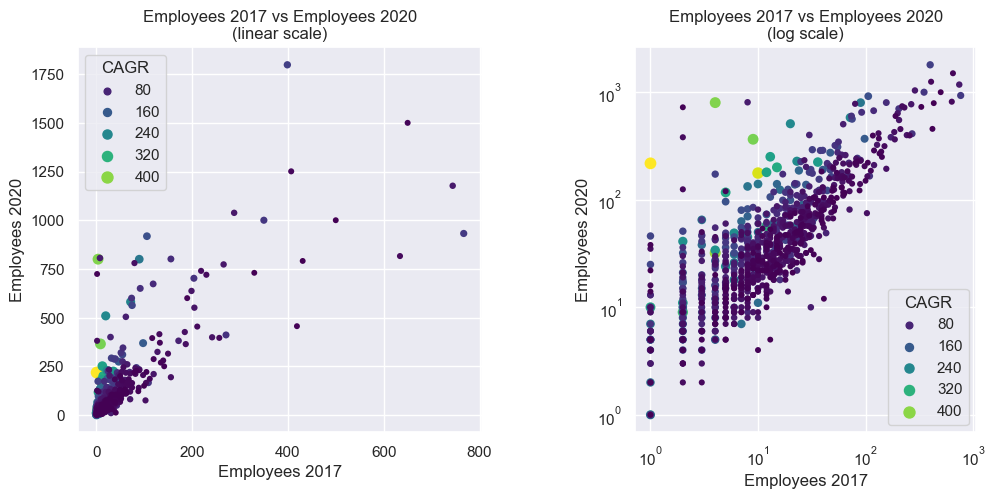

In [19]:
fig, axes = plt.subplots(ncols = 2, figsize = (12, 5))
fig.subplots_adjust(wspace = 0.3)

sns.scatterplot(data = df, x = 'Employees2017', y = 'Employees2020', hue = 'CAGR', size = 'CAGR', edgecolor = 'None', palette = 'viridis', ax = axes[0])
axes[0].set_xlabel('Employees 2017')
axes[0].set_ylabel('Employees 2020')
axes[0].set_title('Employees 2017 vs Employees 2020\n(linear scale)')

sns.scatterplot(data = df, x = 'Employees2017', y = 'Employees2020', hue = 'CAGR', size = 'CAGR', edgecolor = 'None', palette = 'viridis', ax = axes[1])
axes[1].set_xlabel('Employees 2017')
axes[1].set_ylabel('Employees 2020')
axes[1].set_xscale('log')
axes[1].set_yscale('log')
axes[1].set_aspect('equal')
axes[1].set_title('Employees 2017 vs Employees 2020\n(log scale)');

Nhìn chung đa số các công ty có số lượng nhân viên năm 2020 tăng so với năm 2017
-	Trong số đó một vài công ty có số nhân viên tăng đồng thời với mức độ tăng trưởng doanh thu (các điểm gần với trục tung hơn và có màu xanh lá, vàng)
-	Một vài công ty khác có mức tăng nhân viên không quá cao nhưng cũng có mức tăng trưởng CAGR trung bình (các điểm xanh lá, gần đường chéo của mặt phẳng tọa độ)
